In [1]:
import pandas as pd

df = pd.read_csv(r'C:/Users/asus/Downloads/Customer_churn/Customer-Churn_data.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.head()           # Shows first 5 rows
df.info()           # Shows data types and nulls
df.describe()       # Shows summary statistics (for numeric columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.isnull().sum()     # Total missing per column
df = df.dropna()      # Drop rows with any missing value (optional)


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_19432\2576541415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes → 1, No → 0

# Encode other text columns as needed
df['gender'] = le.fit_transform(df['gender'])
df['Contract'] = le.fit_transform(df['Contract'])


**EDA**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

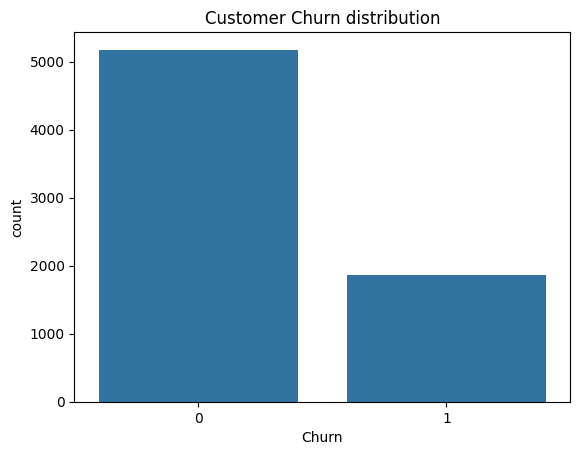

In [8]:
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn distribution')
plt.show()

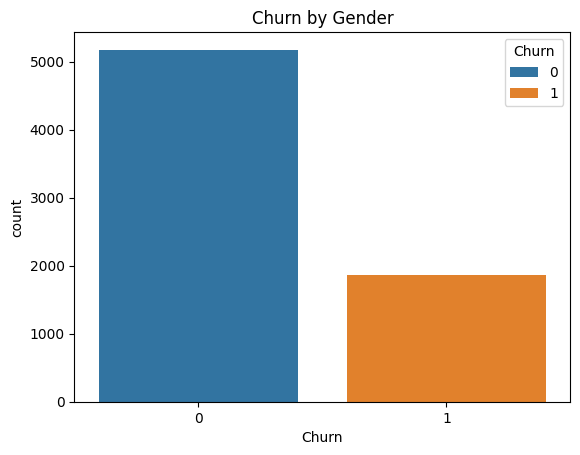

In [9]:
sns.countplot(x='Churn',hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

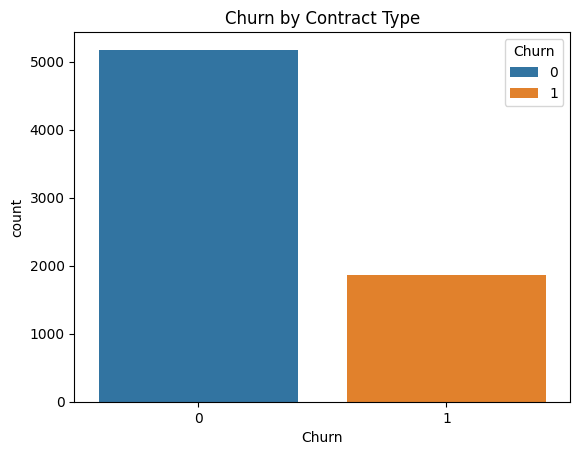

In [11]:
sns.countplot(x='Churn',hue='Churn', data = df)
plt.title('Churn by Contract Type')
plt.show()

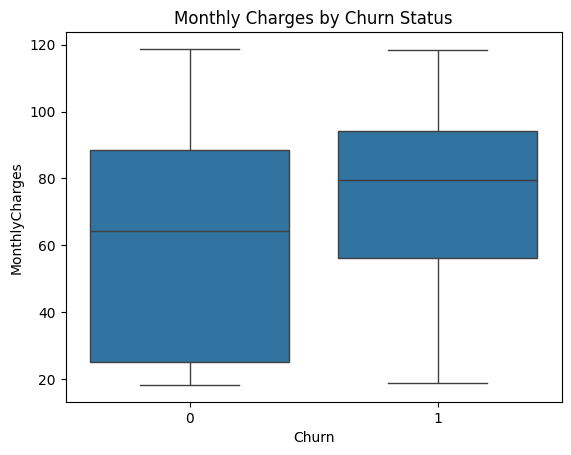

In [14]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()


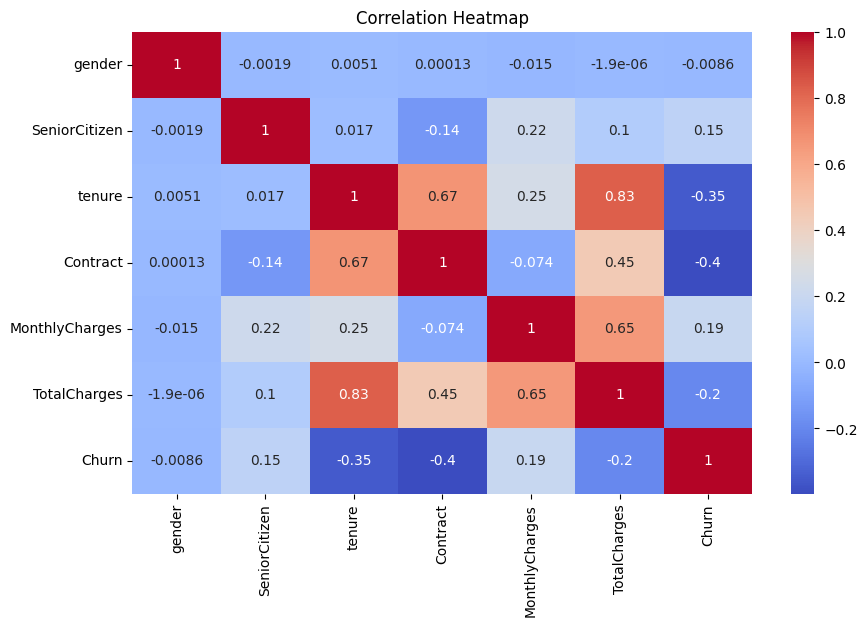

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

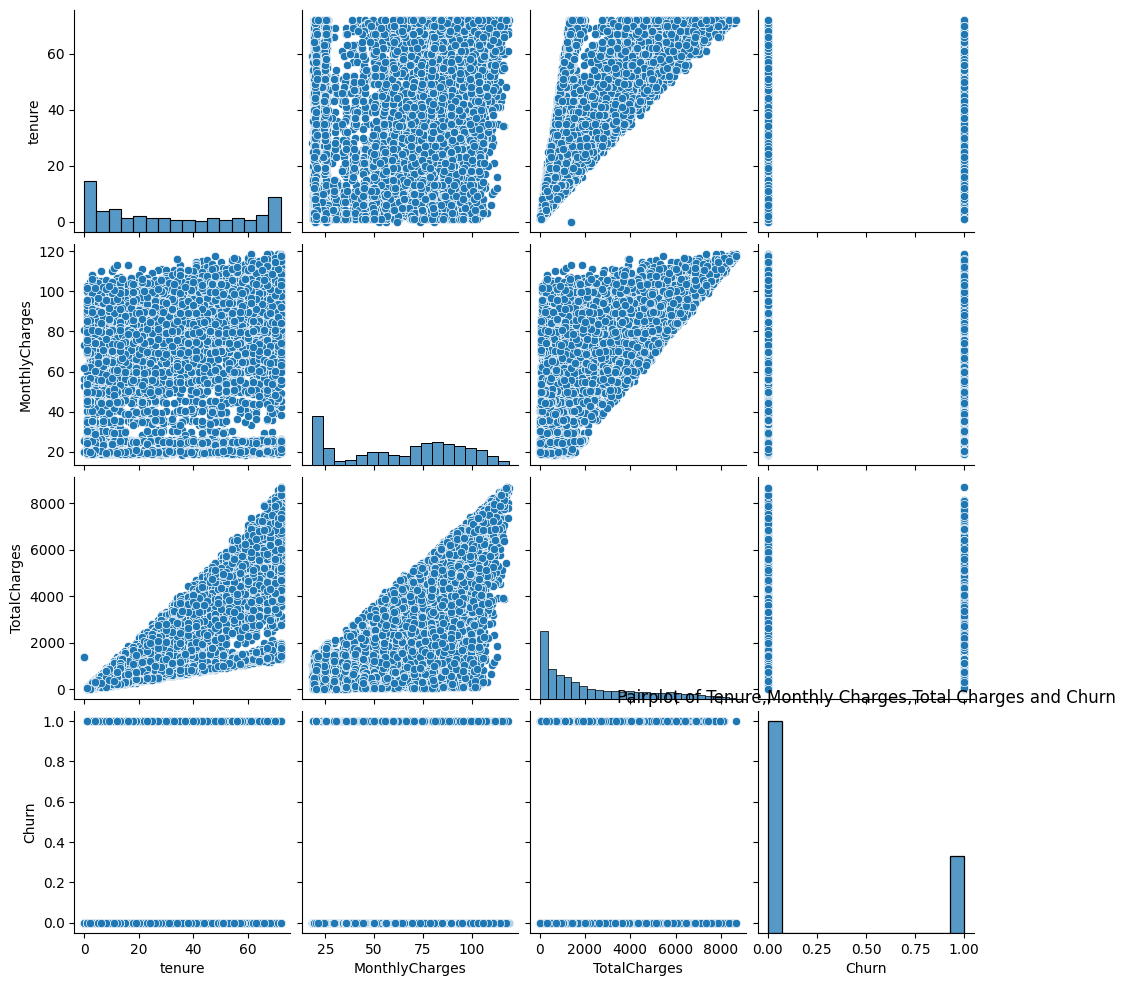

In [20]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']])
plt.title('Pairplot of Tenure,Monthly Charges,Total Charges and Churn')
plt.show()

In [26]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'gender']
target = 'Churn'


# Train-test split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Independent & target variables
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model training(RandomForestClassifier)

In [30]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred=model.predict(X_test)

$$
Accuracy + classification report
$$

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7785663591199432
Confusion Matrix:
 [[915 121]
 [191 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



# Add Churn Probability column

In [45]:
df['Churn_Probability'] = model.predict_proba(X)[:, 1]
def churn_risk(x):
    if x > 0.75:
        return "High Risk"
    elif x > 0.5:
        return "Moderate Risk"
    else:
        return "Low Risk"

df['Churn_Risk'] = df['Churn_Probability'].apply(churn_risk)
df.to_excel("churn final_output.xlsx",index=False)



**# Export to Excel**

In [46]:
df['Churn_Probability'] = model.predict_proba(X)[:, 1]
df.to_excel("churn_final_output.xlsx", index=False)
